İMPORT 

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import stats
from sklearn.linear_model import LinearRegression
import plotly.express as px
from scipy.stats import normaltest

EXPLORATİON DATA SET 

In [133]:
df=pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [7]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
age,2772.0,39.109668,14.081459,18.0000,26.000,39.00000,51.0000,64.00000
bmi,2772.0,30.701349,6.129449,15.9600,26.220,30.44750,34.7700,53.13000
children,2772.0,1.101732,1.214806,0.0000,0.000,1.00000,2.0000,5.00000
charges,2772.0,13261.369959,12151.768945,1121.8739,4687.797,9333.01435,16577.7795,63770.42801


In [9]:
df.describe(include=object).T

,count,unique,top,freq
sex,2772,2,male,1406
smoker,2772,2,no,2208
region,2772,4,southeast,766


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
df_cat=df.select_dtypes(include=object)
df_num=df.select_dtypes(include='number')

Numerical Data Disturbition 

In [34]:
def Dist_num(df_num,nrow,ncol):
    fig,ax=plt.subplots(nrow,ncol,figsize=(nrow*5,ncol*10))
    for i, col in enumerate(df_num.columns):
        g=sns.histplot(x=df_num[col],kde=True,ax=ax[i,0],data=df_num)
        g.set(title=(f"{col} Disturbition"),xlabel=(f"{col}"),ylabel=("Disturbition"))
        mean=df_num[col].mean()
        median=df[col].median()
        mu,sigma=sts.norm.fit(df_num[col])
        stat,p=normaltest(df_num[col])
        text_str=(f"Mu:{mu:.1f},Sigma:{sigma:.1f}\n"
                  f"P_value:{p:.2f}\n"
                  f"Median:{median:.1f}\n")
        g.text(0.95, 0.95, text_str, transform=g.transAxes,
                 fontsize=10, verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        g1=sns.boxplot(y=df_num[col],ax=ax[i,1],data=df_num,color='red')
        g1.set(title=(f"{col} Box Graph"),ylabel=(f"{col}"),xlabel=("Disturbition"))
        
        Q1=df_num[col].quantile(0.25)
        Q3=df_num[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = np.sum((df_num[col] < lower_bound) | (df_num[col] > upper_bound))
        text_str1=(f"Median:{median:.2f}\n"
              f"IQR:{IQR:.1f}\n"
              f"Lower Bound:{lower_bound:.1f}\n"
              f"Upper Bound:{upper_bound:.1f}\n"
              f"Outliers Number:{outliers}\n")
        g1.text(0.95, 0.95, text_str1, transform=g1.transAxes,
                fontsize=10, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat'))
    
    plt.tight_layout()
    plt.show()
        

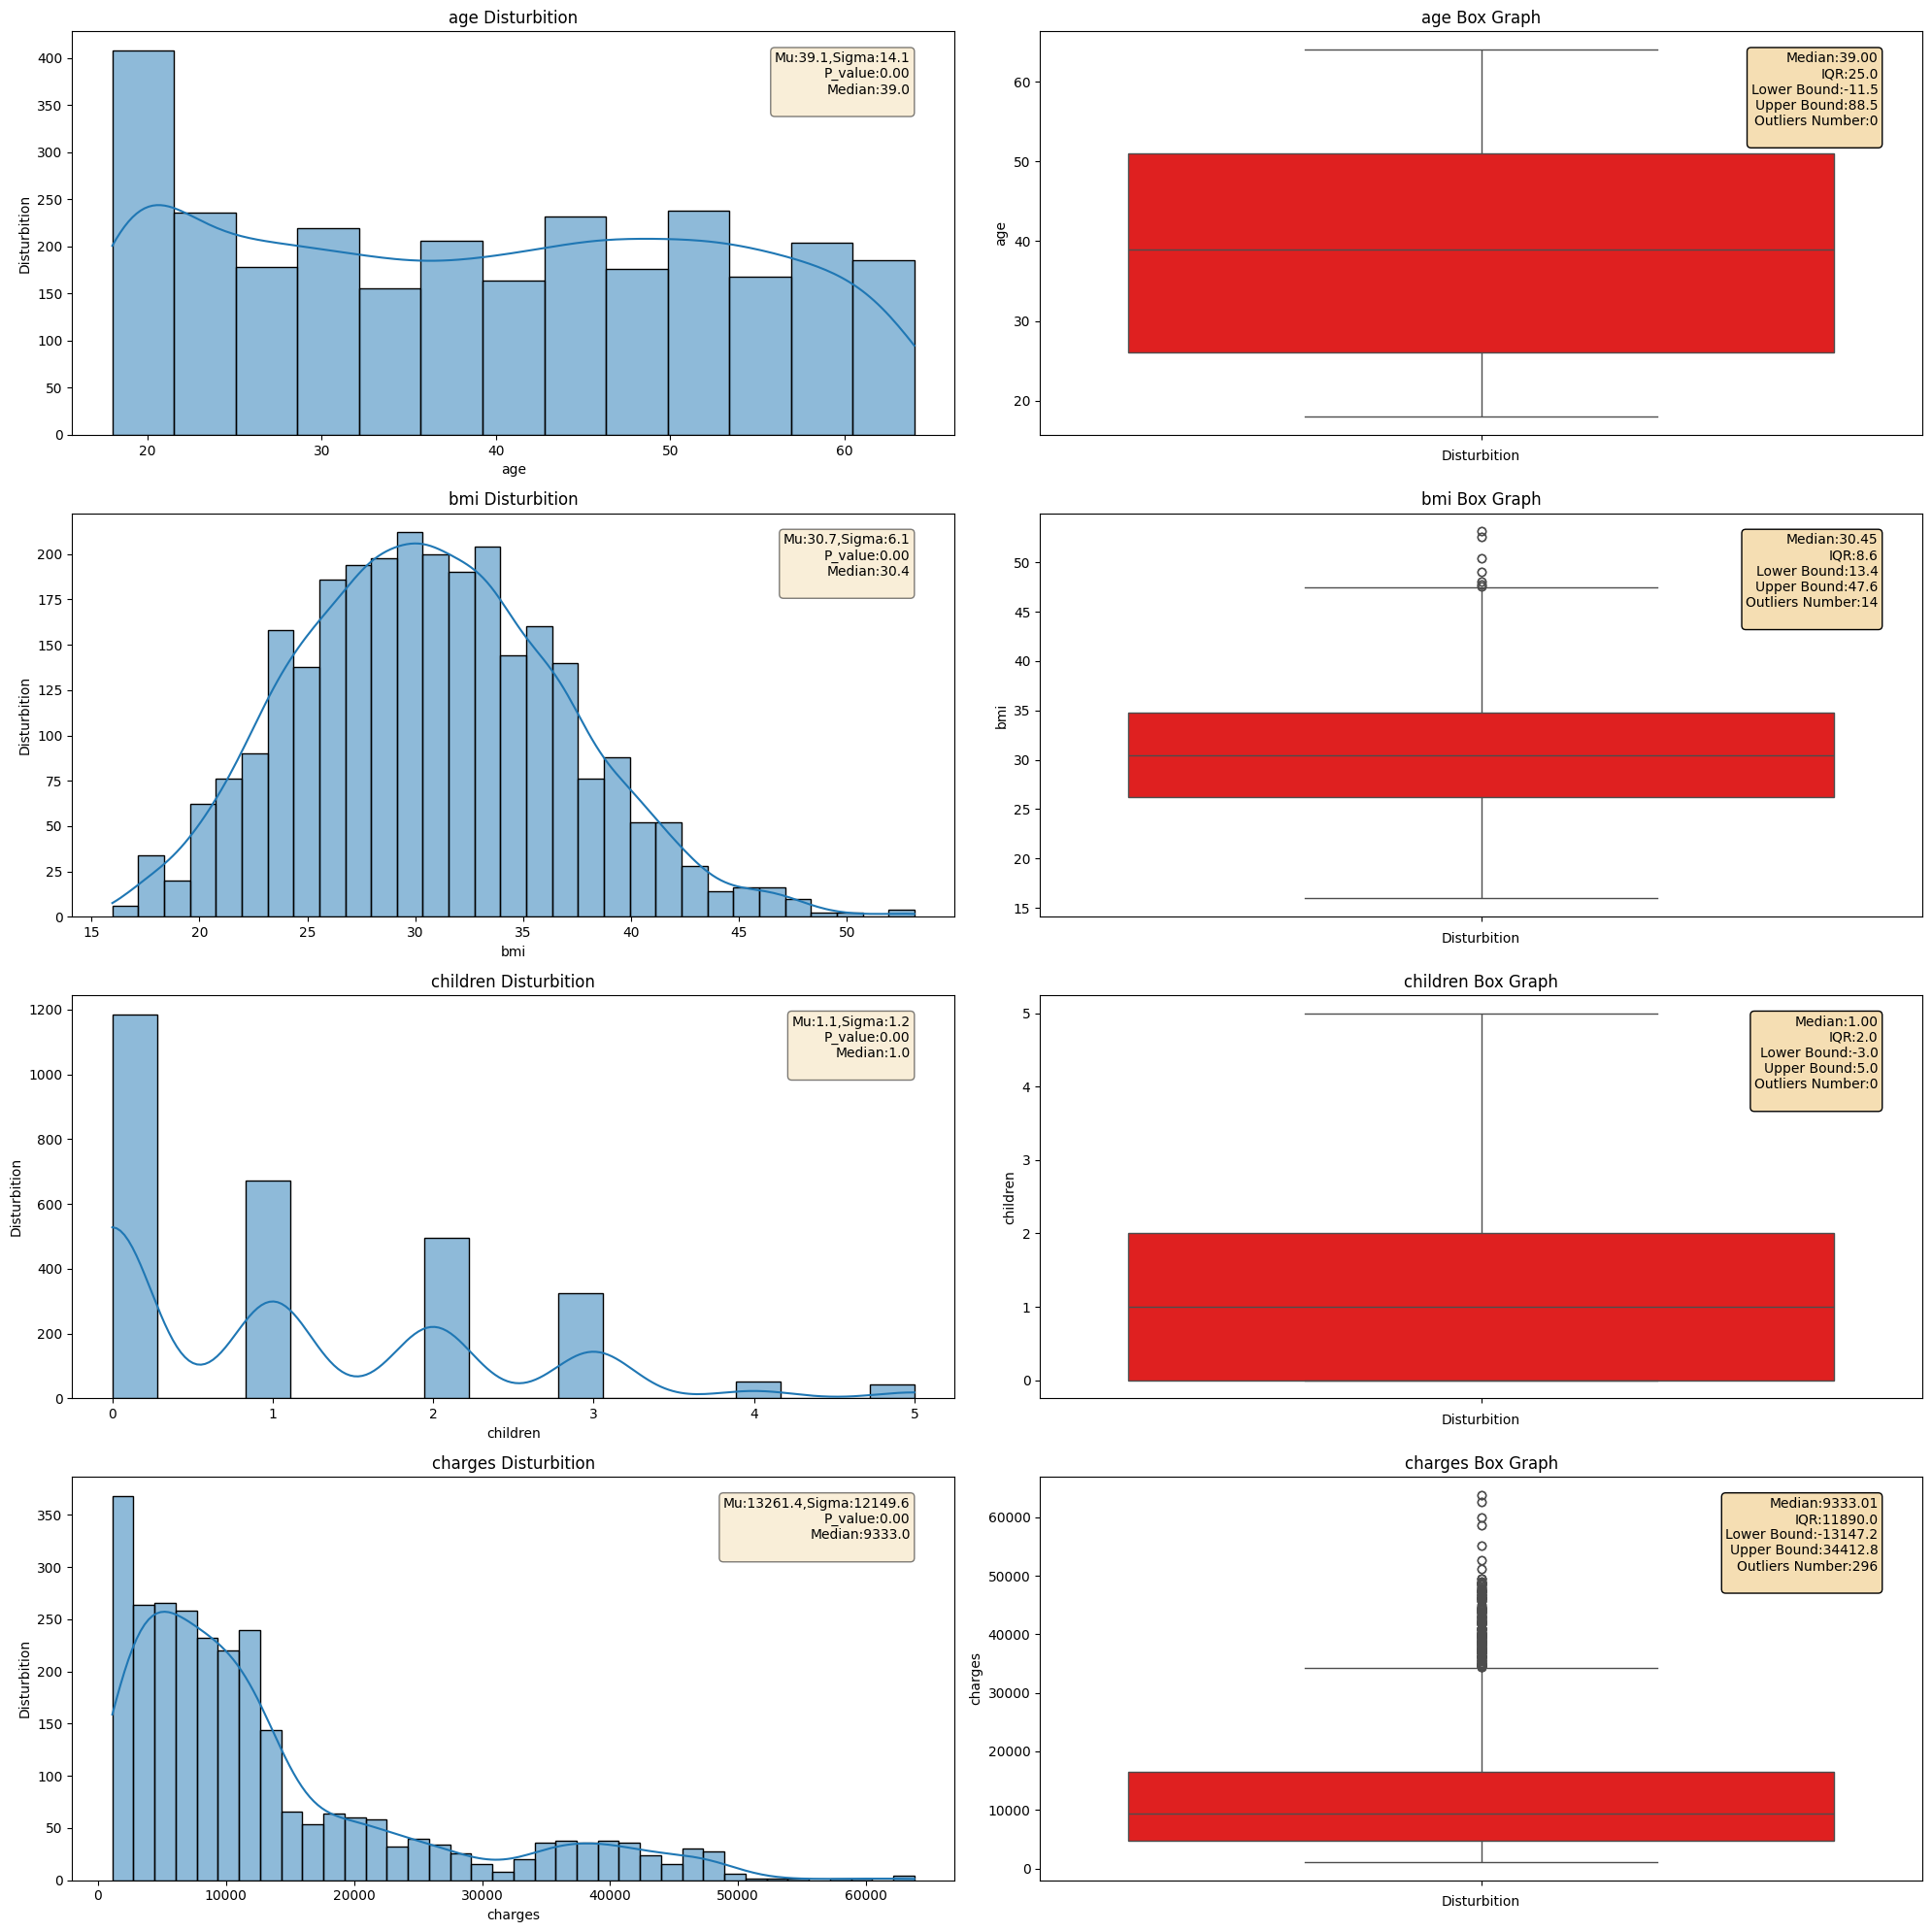

In [35]:
Dist_num(df_num,4,2)

Categorical Data Disturbition

In [39]:
df_cat

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
2767,female,no,southeast
2768,female,no,southwest
2769,male,yes,northwest
2770,male,no,northwest


In [48]:
def Hist_cat(df_cat,nrow,ncol):
    fig,ax=plt.subplots(nrow,ncol,figsize=(nrow*5,ncol*6))
    for i, col in enumerate(df_cat.columns):
        g=sns.countplot(x=df_cat[col],ax=ax[i,0],data=df_cat,hue=df_cat[col])
        g.set(title=(f"{col} Bar Count Graph"),xlabel=(f"{col}"),ylabel=("Count"))
        
        df_cat[col].value_counts().plot.pie(ax=ax[i, 1], autopct='%1.1f%%', startangle=90)
        ax[i, 1].set_title(f"{col} Pie Chart")
        ax[i, 1].set_ylabel('')
        
plt.tight_layout()
plt.show()
        
        
    
    

<Figure size 640x480 with 0 Axes>

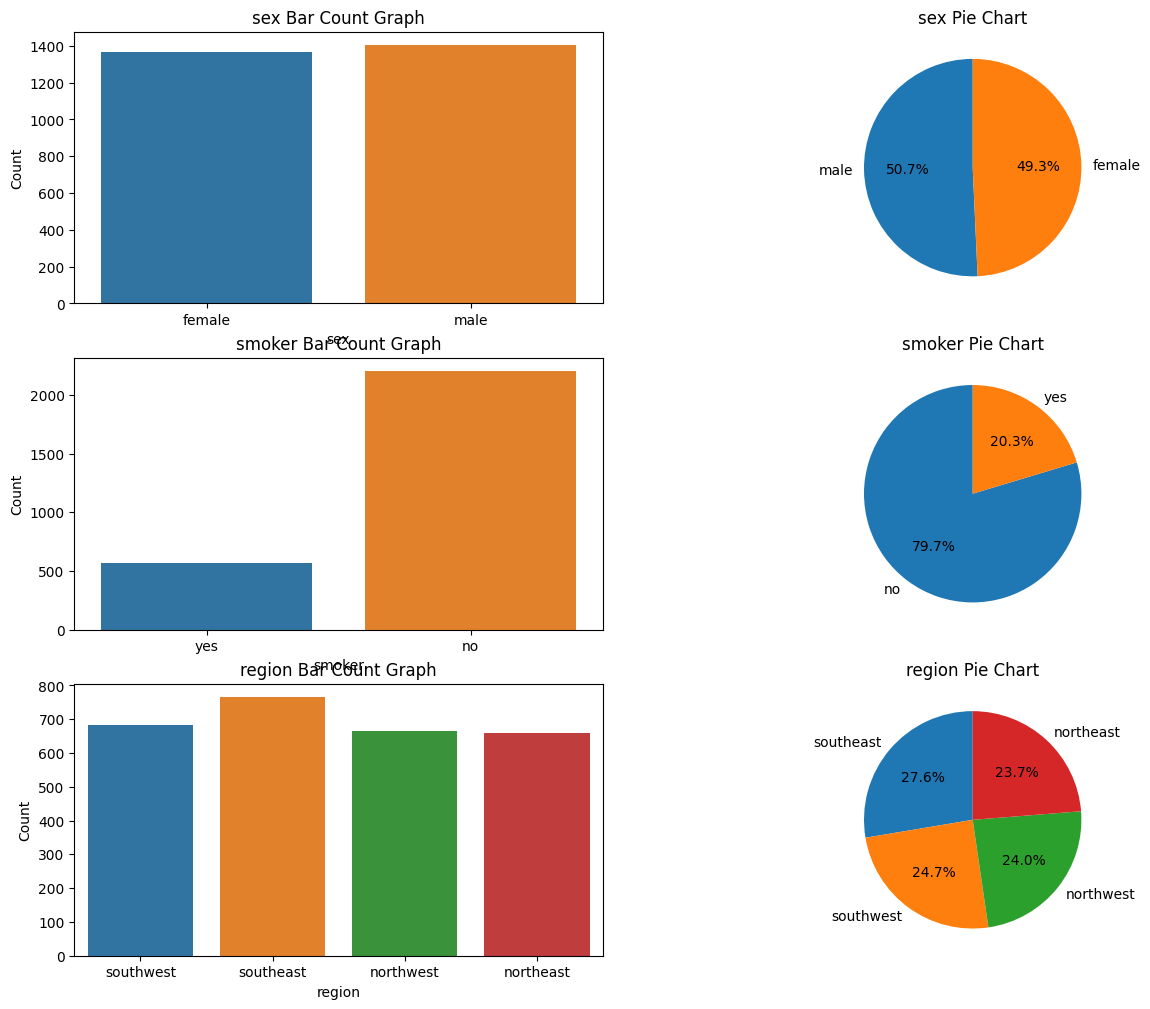

In [49]:
Hist_cat(df_cat,3,2)

Numerical Columns and Categorical Columns vs Target Columns  

In [50]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [60]:
df_num.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [124]:
def Corr(df_num,nrow,ncol):
    fig,axes=plt.subplots(nrow,ncol,figsize=(nrow*5,ncol*12))
    for i, col in enumerate(df_num.columns[:3]):
        g=sns.regplot(x=df[col],y=df['charges'],data=df_num,
                    scatter_kws={"s": 100, "alpha": 0.5}, line_kws={"ls": "--", "lw": 2, "color": "red"},ax=axes[i])
        g.set(title=(f"{col} vs Charge"),ylabel=('Charge'),xlabel=(f"{col}"))
        corr, p= stats.pearsonr(df_num[col],df_num['charges'])
        text_str=(f"corr:{corr:.2f}\n"
                  f"P_value:{p:.4f}\n")
        g.text(0.95, 0.95, text_str, transform=g.transAxes,
                 fontsize=15, verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        
    plt.tight_layout()
    plt.show()
        
    

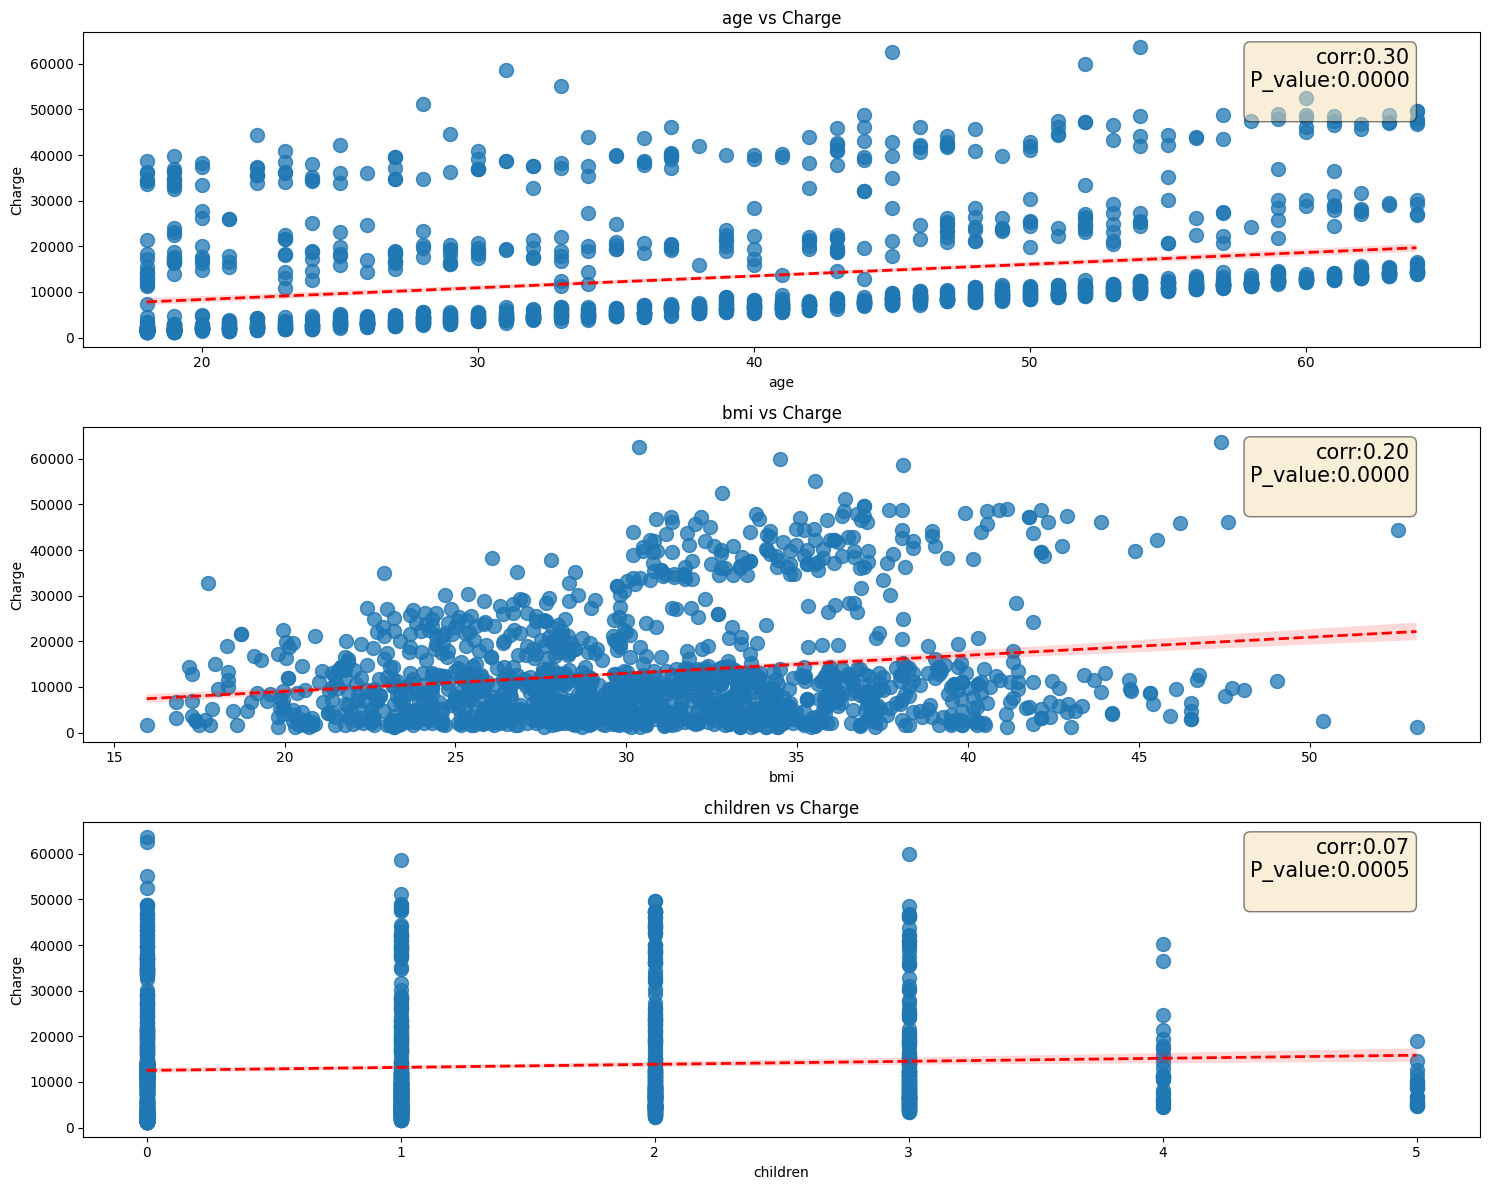

In [125]:
Corr(df_num,3,1)

In [92]:
def cat_graps(df_cat,y, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))


    
    for i, kolon_adı in enumerate(df_cat.columns):
        row_index = i // num_cols
        col_index = i % num_cols
        ax = axes[row_index, col_index]

        tmp=df.groupby(df[kolon_adı]).agg('sum')['charges']
        tmp=tmp.reset_index()
        tot=tmp[y].sum()
        tmp[y]=(tmp['charges']/tot)*100
        tmp
        
        if len(df[kolon_adı].value_counts())==2:
            stat,p=sts.mannwhitneyu(*[group["charges"].values for name, group in df.groupby(kolon_adı)],use_continuity = True)
            
            g = sns.boxplot(x=df[kolon_adı],y=df[y], ax=ax,color=sns.color_palette("Spectral")[1])
            g.set(title=f'Box Plot - {kolon_adı}', xlabel=kolon_adı)
            g.legend(['Mannwhitney-U Stat: {:.2f} and P-Value: {:.3f}'.format(stat,p)],loc='upper center')
            
        elif len(df[kolon_adı].value_counts())>2:
            sts.kruskal(*[group["charges"].values for name, group in df.groupby(kolon_adı)],nan_policy='omit')
            g = sns.boxplot(x=df[kolon_adı],y=df[y], ax=ax,color=sns.color_palette("Spectral")[1])
            g.set(title=f'Box Plot - {kolon_adı}', xlabel=kolon_adı)
            g.legend(['Kruskal Stat: {:.2f} and P-Value: {:.3f}'.format(stat,p)],loc='upper center')
        sizes = []
        g1 = g.twinx()
        plt.grid(False)
        g1= sns.pointplot(x=kolon_adı, y=y, data=tmp,
                   linestyles="--", color=sns.color_palette("crest")[2],
                   order=list(tmp[kolon_adı].values),
                   markersize=5,
                   legend=False)
        g1.set_ylabel(f'Ratio of total Charges by {kolon_adı}')
    for i in range(len(df_cat.columns), num_rows * num_cols):
        row_index = i // num_cols
        col_index = i % num_cols
        fig.delaxes(axes[row_index, col_index])
    g.set_ylim(0,12)
    plt.tight_layout()
    plt.show()

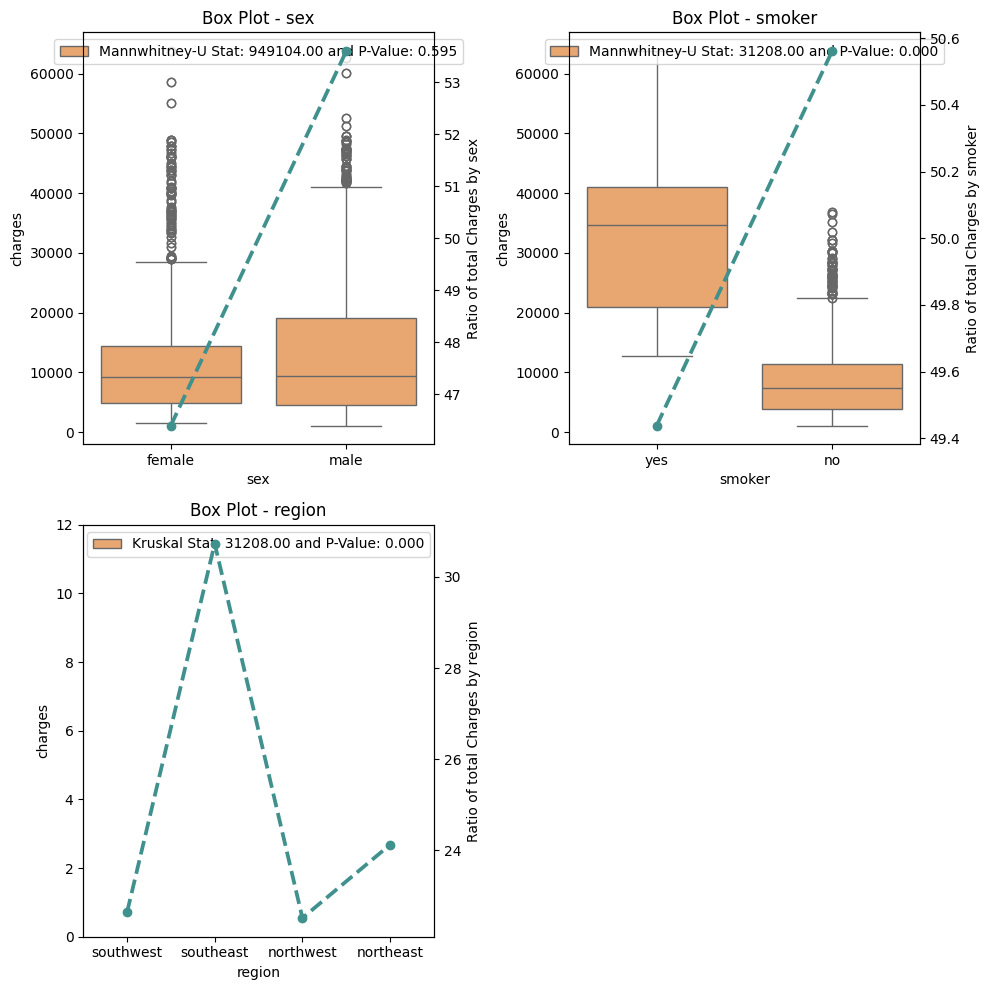

In [93]:
cat_graps(df_cat,'charges',2,2)

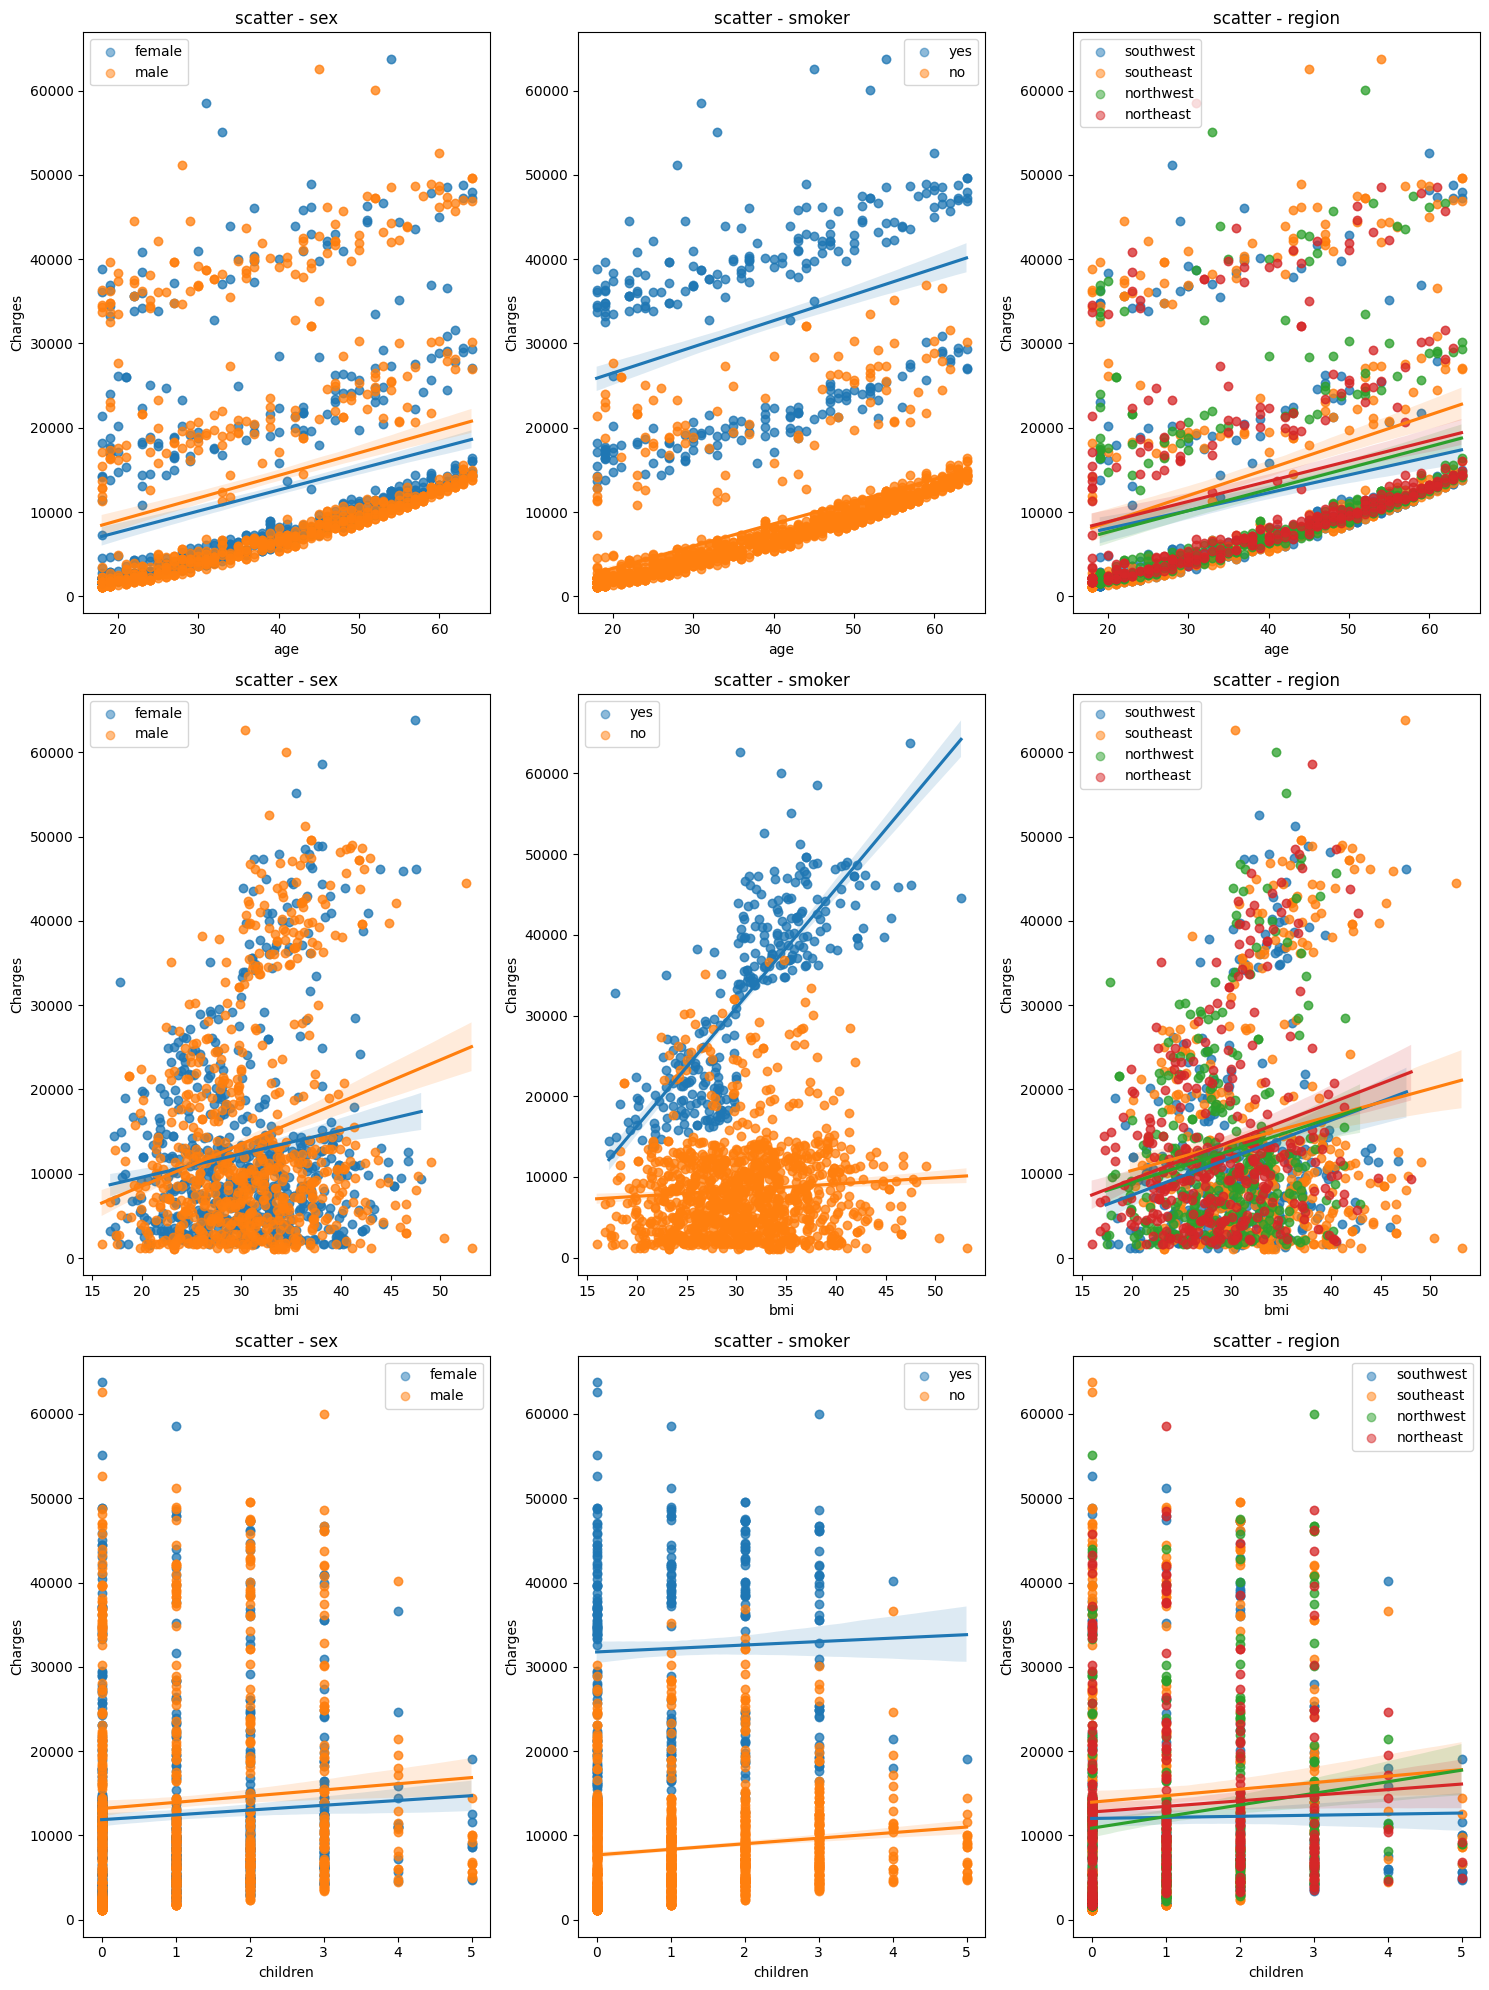

In [119]:
plt.figure(figsize=(15,20))

for i, num_col in enumerate(df_num.columns[:3]): 
    for j, cat_col in enumerate(df_cat.columns):  
        plt.subplot(3, 3, i * 3 + j + 1)  

        for value in df_cat[cat_col].unique():  
            subset = df[df_cat[cat_col] == value] 
            g = sns.regplot(x=num_col, y='charges', data=subset, label=value, scatter_kws={"alpha": 0.5})  
            g.set(title=f'scatter - {cat_col}', xlabel=num_col, ylabel='Charges')  
            g.legend()  
plt.tight_layout()
plt.show()

Feature Engineering


In [134]:
dfx=df.copy()

In [131]:
df['age'].max()

64

In [135]:
bins=[15.96,18.5,25,30,53.13]
labels=['Weak','Normal','Overweight','Obese']
dfx['Weight']=pd.cut(dfx['bmi'],labels=labels,bins=bins,include_lowest= True)
dfx

,age,sex,bmi,children,smoker,region,charges,Weight
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,Obese
2768,21,female,34.600,0,no,southwest,2020.17700,Obese
2769,19,male,26.030,1,yes,northwest,16450.89470,Overweight
2770,23,male,18.715,0,no,northwest,21595.38229,Normal


In [138]:
bins=[18,30,40,50,64]
labels=['Youth','Young Adult','Middle Aged','Elderly']
dfx['Age Group']=pd.cut(dfx['age'],labels=labels,bins=bins,include_lowest=True)
dfx

,age,sex,bmi,children,smoker,region,charges,Weight,Age Group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Youth
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Youth
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Youth
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Young Adult
...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,Obese,Middle Aged
2768,21,female,34.600,0,no,southwest,2020.17700,Obese,Youth
2769,19,male,26.030,1,yes,northwest,16450.89470,Overweight,Youth
2770,23,male,18.715,0,no,northwest,21595.38229,Normal,Youth


In [150]:
from scipy.stats import chi2_contingency
cross_tab = pd.crosstab(df['age'], df['smoker'])
chi2, p_value, dof, expected = chi2_contingency(cross_tab)


print("Ki-kare İstatistiği:", chi2)
print("p-değeri:", p_value)
print("Serbestlik Derecesi:", dof)
print("Beklenen Frekanslar:")
print(expected)
alpha = 0.05


if p_value < alpha:
    print("\nİki değişken arasında anlamlı bir ilişki vardır. Null hipotez reddedilir.")
else:
    print("\nİki değişken arasında anlamlı bir ilişki yoktur. Null hipotez kabul edilir.")


Ki-kare İstatistiği: 119.3698907266423
p-değeri: 1.9539910204487507e-08
Serbestlik Derecesi: 46
Beklenen Frekanslar:
[[117.88744589  30.11255411]
 [113.10822511  28.89177489]
 [ 46.1991342   11.8008658 ]
 [ 47.79220779  12.20779221]
 [ 47.79220779  12.20779221]
 [ 49.38528139  12.61471861]
 [ 44.60606061  11.39393939]
 [ 46.1991342   11.8008658 ]
 [ 47.79220779  12.20779221]
 [ 46.1991342   11.8008658 ]
 [ 47.79220779  12.20779221]
 [ 43.01298701  10.98701299]
 [ 44.60606061  11.39393939]
 [ 43.01298701  10.98701299]
 [ 44.60606061  11.39393939]
 [ 43.01298701  10.98701299]
 [ 41.41991342  10.58008658]
 [ 39.82683983  10.17316017]
 [ 39.82683983  10.17316017]
 [ 41.41991342  10.58008658]
 [ 39.82683983  10.17316017]
 [ 43.01298701  10.98701299]
 [ 43.01298701  10.98701299]
 [ 44.60606061  11.39393939]
 [ 43.01298701  10.98701299]
 [ 43.01298701  10.98701299]
 [ 44.60606061  11.39393939]
 [ 49.38528139  12.61471861]
 [ 47.79220779  12.20779221]
 [ 49.38528139  12.61471861]
 [ 46.1991342

In [158]:
result_yes=df[df['smoker']=='yes'].groupby(['age'])['charges'].mean().reset_index()
result_yes.columns = ['age', 'charges_yes']
result_no=df[df['smoker']=='no'].groupby(['age'])['charges'].mean().reset_index()
result_no.columns = ['age', 'charges_no'] 
merged_df = pd.merge(result_yes, result_no, on='age', how='outer')
merged_df.sort_values(by=['charges_yes'],ascending=False)

,age,charges_yes,charges_no
42,60,48115.446238,14719.410804
40,58,47496.494450,12468.042368
36,54,44792.434652,12944.914036
37,55,43363.747575,13897.945315
46,64,40569.885331,15805.350545
45,63,40331.784380,14205.335706
27,45,40249.364382,9433.804382
23,41,39935.526350,7194.993644
26,44,39369.904893,10186.042787
43,61,38578.794592,16181.750438


In [163]:
smoker_age_mean = dfx[dfx['smoker'] == 'yes']['age'].mean()
non_smoker_age_mean = dfx[dfx['smoker'] == 'no']['age'].mean()

dfx['age_difference'] = dfx['age'] - dfx['smoker'].map({'yes': smoker_age_mean, 'no': non_smoker_age_mean})
dfx

,age,sex,bmi,children,smoker,region,charges,Weight,Age Group,age_difference
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Youth,-19.460993
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Youth,-21.275362
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Youth,-11.275362
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Young Adult,-6.275362
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Young Adult,-7.275362
...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,Obese,Middle Aged,7.724638
2768,21,female,34.600,0,no,southwest,2020.17700,Obese,Youth,-18.275362
2769,19,male,26.030,1,yes,northwest,16450.89470,Overweight,Youth,-19.460993
2770,23,male,18.715,0,no,northwest,21595.38229,Normal,Youth,-16.275362


In [164]:
smoker_df = dfx[dfx['smoker'] == 'yes']
non_smoker_df = dfx[dfx['smoker'] == 'no']

smoker_coef = np.polyfit(smoker_df['age'], smoker_df['charges'], 1)[0]
non_smoker_coef = np.polyfit(non_smoker_df['age'], non_smoker_df['charges'], 1)[0]

# Yaşa göre maliyet artış hızı farkını ifade eden bir özellik oluşturma
dfx['age_smoking_interaction'] = dfx['age'] * (smoker_coef - non_smoker_coef)
dfx

,age,sex,bmi,children,smoker,region,charges,Weight,Age Group,age_difference,age_smoking_interaction
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Youth,-19.460993,866.340021
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Youth,-21.275362,820.743178
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Youth,-11.275362,1276.711610
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Young Adult,-6.275362,1504.695827
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Young Adult,-7.275362,1459.098983
...,...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,Obese,Middle Aged,7.724638,2143.051632
2768,21,female,34.600,0,no,southwest,2020.17700,Obese,Youth,-18.275362,957.533708
2769,19,male,26.030,1,yes,northwest,16450.89470,Overweight,Youth,-19.460993,866.340021
2770,23,male,18.715,0,no,northwest,21595.38229,Normal,Youth,-16.275362,1048.727394


Label Encoder and Scaler

In [188]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [184]:
x=dfx.drop('charges',axis=1)
y=dfx['charges']
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.25,random_state=42)

In [167]:
lb=LabelEncoder()
for col in dfx.select_dtypes(include=object).columns:
    dfx[col]=lb.fit_transform(dfx[col])
for col in ['Weight','Age Group']:
    dfx[col]=lb.fit_transform(dfx[col])
dfx


,age,sex,bmi,children,smoker,region,charges,Weight,Age Group,age_difference,age_smoking_interaction
0,19,0,27.900,0,1,3,16884.92400,Overweight,Youth,-19.460993,866.340021
1,18,1,33.770,1,0,2,1725.55230,Obese,Youth,-21.275362,820.743178
2,28,1,33.000,3,0,2,4449.46200,Obese,Youth,-11.275362,1276.711610
3,33,1,22.705,0,0,1,21984.47061,Normal,Young Adult,-6.275362,1504.695827
4,32,1,28.880,0,0,1,3866.85520,Overweight,Young Adult,-7.275362,1459.098983
...,...,...,...,...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2,8569.86180,Obese,Middle Aged,7.724638,2143.051632
2768,21,0,34.600,0,0,3,2020.17700,Obese,Youth,-18.275362,957.533708
2769,19,1,26.030,1,1,1,16450.89470,Overweight,Youth,-19.460993,866.340021
2770,23,1,18.715,0,0,1,21595.38229,Normal,Youth,-16.275362,1048.727394


In [191]:
class ScalerComparison:
    def __init__(self, models):
        self.scalers = {
            'StandardScaler': StandardScaler(),
            'MinMaxScaler': MinMaxScaler(),
            'RobustScaler': RobustScaler(),
            'MaxAbsScaler': MaxAbsScaler()
        }
        self.models = models
    def fit(self, x, y):
        results = {}
        for scaler_name, scaler in self.scalers.items():
            model_results = {}
            for model_name, model in self.models:
                pipeline = Pipeline([
                    ('scaler', scaler),
                    ('model', model)
                ])
                pipeline.fit(x_tr, y_tr)
                y_pred = pipeline.predict(x_ts)
                r2 = r2_score(y_ts, y_pred)
                rmse = np.sqrt(mean_squared_error(y_ts, y_pred))
                mse= mean_squared_error(y_ts,y_pred)
                mae= mean_absolute_error(y_ts,y_pred)
                model_results[model_name] = {'R2': r2, 'RMSE': rmse,'MSe':mse,'Mae':mae}
            results[scaler_name] = model_results
        return results

Model Building

In [177]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,SGDRegressor,PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV

In [192]:
models = [
          ('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('HistgBM',HistGradientBoostingRegressor()),
          ('GBM',GradientBoostingRegressor()),
          ('RF', RandomForestRegressor()),
          ("XGBoost",XGBRegressor()),
          ("XGBoostRF", XGBRFRegressor()),
          ("LightGBM", LGBMRegressor(verbose=-1)),
          ("SGDR",SGDRegressor()),
          ("PasRg",PassiveAggressiveRegressor()),
          ('SVR', SVR())]
scaler_comparison = ScalerComparison(models)
results = scaler_comparison.fit(x, y)

# Sonuçları DataFrame'e dönüştürme
results_df = pd.DataFrame.from_dict({(scaler_name, model_name): results[scaler_name][model_name]
                                      for scaler_name in results.keys() 
                                      for model_name in results[scaler_name].keys()},
                                    orient='index')
results_df


c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.945e+09, tolerance: 2.986e+07
  model = cd_fast.enet_coordinate_descent(


R2          RMSE           MSe          Mae
StandardScaler LR          0.740833   6429.210077  4.133474e+07  4255.403444
               Ridge       0.740676   6431.160729  4.135983e+07  4252.213159
               Lasso       0.740705   6430.803048  4.135523e+07  4251.321035
               ElasticNet  0.658981   7374.918571  5.438942e+07  5221.020968
               KNN         0.860883   4710.401054  2.218788e+07  2405.472526
               CART        0.930743   3323.526972  1.104583e+07   776.792063
               HistgBM     0.892171   4147.021280  1.719779e+07  2230.206839
               GBM         0.875870   4449.448702  1.979759e+07  2322.581157
               RF          0.934258   3238.105897  1.048533e+07  1444.136138
               XGBoost     0.933671   3252.524763  1.057892e+07  1375.982117
               XGBoostRF   0.879076   4391.623285  1.928636e+07  2266.688009
               LightGBM    0.892535   4140.020728  1.713977e+07  2200.422086
               SGDR        0.740867   6428.790718  4.132935e+07  4253.773346
               PasRg       0.681139   7131.304608  5.085551e+07  3486.045672
               SVR        -0.080877  13129.738603  1.723900e+08  8506.646704
MinMaxScaler   LR          0.740586   6432.277994  4.137420e+07  4262.561208
               Ridge       0.740559   6432.609278  4.137846e+07  4246.288556
               Lasso       0.740724   6430.561974  4.135213e+07  4249.612928
               ElasticNet  0.327408  10357.238013  1.072724e+08  7577.348697
               KNN         0.851734   4862.823304  2.364705e+07  2593.183411
               CART        0.936946   3171.215131  1.005661e+07   728.152777
               HistgBM     0.892171   4147.021280  1.719779e+07  2230.206839
               GBM         0.875864   4449.562405  1.979861e+07  2323.471072
               RF          0.934020   3243.954489  1.052324e+07  1484.232527
               XGBoost     0.933671   3252.524763  1.057892e+07  1375.982117
               XGBoostRF   0.879076   4391.623285  1.928636e+07  2266.688009
               LightGBM    0.898977   4014.008854  1.611227e+07  2157.632095
               SGDR        0.740271   6436.174963  4.142435e+07  4202.630993
               PasRg       0.682860   7112.026040  5.058091e+07  3489.682235
               SVR        -0.078390  13114.628344  1.719935e+08  8488.174355
RobustScaler   LR          0.740819   6429.383534  4.133697e+07  4251.489572
               Ridge       0.740589   6432.243810  4.137376e+07  4255.709936
               Lasso       0.740723   6430.580876  4.135237e+07  4251.175999
               ElasticNet  0.374919   9984.725095  9.969474e+07  7452.596925
               KNN         0.827871   5239.557710  2.745296e+07  2689.324620
               CART        0.931273   3310.789560  1.096133e+07   777.181599
               HistgBM     0.892171   4147.021280  1.719779e+07  2230.206839
               GBM         0.875870   4449.451585  1.979762e+07  2322.611729
               RF          0.931656   3301.553636  1.090026e+07  1467.732548
               XGBoost     0.933671   3252.524763  1.057892e+07  1375.982117
               XGBoostRF   0.879076   4391.623285  1.928636e+07  2266.688009
               LightGBM    0.892660   4137.600205  1.711974e+07  2222.063919
               SGDR        0.740116   6438.106552  4.144922e+07  4236.417287
               PasRg       0.680960   7133.300355  5.088397e+07  3488.780967
               SVR        -0.085222  13156.107543  1.730832e+08  8539.090764
MaxAbsScaler   LR          0.740818   6429.401022  4.133720e+07  4251.957471
               Ridge       0.740456   6433.883397  4.139486e+07  4236.839604
               Lasso       0.740734   6430.446445  4.135064e+07  4248.722216
               ElasticNet  0.335207  10297.015007  1.060285e+08  7547.699040
               KNN         0.837525   5090.511614  2.591331e+07  2747.189281
               CART        0.931493   3305.483771  1.092622e+07   776.475552
               HistgBM     0.

In [193]:
results_df.sort_values(by='R2',ascending=False)

,,R2,RMSE,MSe,Mae
MinMaxScaler,CART,0.936946,3171.215131,1.005661e+07,728.152777
MaxAbsScaler,RF,0.936442,3183.853882,1.013693e+07,1426.817818
StandardScaler,RF,0.934258,3238.105897,1.048533e+07,1444.136138
MinMaxScaler,RF,0.934020,3243.954489,1.052324e+07,1484.232527
MaxAbsScaler,XGBoost,0.933671,3252.524763,1.057892e+07,1375.982117
RobustScaler,XGBoost,0.933671,3252.524763,1.057892e+07,1375.982117
MinMaxScaler,XGBoost,0.933671,3252.524763,1.057892e+07,1375.982117
StandardScaler,XGBoost,0.933671,3252.524763,1.057892e+07,1375.982117
RobustScaler,RF,0.931656,3301.553636,1.090026e+07,1467.732548
MaxAbsScaler,CART,0.931493,3305.483771,1.092622e+07,776.475552


Normal Df Model

In [198]:
x=df.drop('charges',axis=1)
y=df['charges']
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.25,random_state=42)

In [199]:
lb=LabelEncoder()
for col in df.select_dtypes(include=object).columns:
    df[col]=lb.fit_transform(df[col])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2,8569.86180
2768,21,0,34.600,0,0,3,2020.17700
2769,19,1,26.030,1,1,1,16450.89470
2770,23,1,18.715,0,0,1,21595.38229


In [202]:
models = [
          ('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('HistgBM',HistGradientBoostingRegressor()),
          ('GBM',GradientBoostingRegressor()),
          ('RF', RandomForestRegressor()),
          ("XGBoost",XGBRegressor()),
          ("XGBoostRF", XGBRFRegressor()),
          ("LightGBM", LGBMRegressor(verbose=-1)),
          ("SGDR",SGDRegressor()),
          ("PasRg",PassiveAggressiveRegressor()),
          ('SVR', SVR())]
model_score = {'Model':[],'R2':[],'Rmse':[],'Mae':[]}
for name, model in models:
    
    model.fit(x_tr, y_tr)
    y_pr=model.predict(x_ts)
    r2=r2_score(y_ts,y_pr)
    mae=mean_absolute_error(y_ts,y_pr)
    rmse=np.sqrt(mean_squared_error(y_ts,y_pr))
    model_score['Model'].append(name)
    model_score['R2'].append(r2)
    model_score['Rmse'].append(rmse)
    model_score['Mae'].append(mae)
    
    
    
model_score=pd.DataFrame(model_score)

model_score.sort_values(by='R2',ascending=False)

,Model,R2,Rmse,Mae
5,CART,0.939432,3108.068275,686.364022
9,XGBoost,0.938268,3137.777050,1311.877331
8,RF,0.934564,3230.538053,1449.512334
11,LightGBM,0.896231,4068.189639,2211.906011
6,HistgBM,0.890844,4172.465386,2237.876725
10,XGBoostRF,0.878626,4399.773957,2304.957678
7,GBM,0.877674,4417.003874,2321.242091
0,LR,0.740044,6438.995409,4293.776377
2,Lasso,0.740034,6439.113232,4294.069672
1,Ridge,0.739922,6440.502061,4299.126951


Optimazation dfx

In [331]:
scaler_x = MinMaxScaler()
x_tr= scaler_x.fit_transform(x_tr)  # Bağımsız değişkenleri ölçeklendir
y_tr = scaler_x.fit_transform(y_tr.values.reshape(-1, 1)).flatten()  # Bağımlı değişkeni ölçeklendir
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.25, random_state=42)

In [332]:
from sklearn.model_selection import cross_validate
Cart=DecisionTreeRegressor()
Cart.fit(x_tr,y_tr)
score=Cart.score(x_ts,y_ts)
y_pr=Cart.predict(x_ts)
r2=r2_score(y_ts,y_pr)
rmse=np.sqrt(mean_squared_error(y_ts,y_pr))
cross=cross_validate(Cart,x_tr,y_tr,cv=15)
print("Score",score)
print("R2",r2)
print("Rmse",rmse)
print(f"="*50)
print("Cross",cross)

Score 0.9339937649616858
R2 0.9339937649616858
Rmse 3244.5951428419835
Cross {'fit_time': array([0.01200223, 0.01100159, 0.01100492, 0.01200175, 0.01099443,
       0.01100135, 0.0110023 , 0.01000118, 0.01100707, 0.01200938,
       0.01100802, 0.01099086, 0.01101446, 0.01099372, 0.01100206]), 'score_time': array([0.0010004 , 0.00100017, 0.0009985 , 0.00100017, 0.00100112,
       0.00200033, 0.00100064, 0.0020051 , 0.00099897, 0.00198746,
       0.0010004 , 0.0010004 , 0.00198913, 0.00100136, 0.00200033]), 'test_score': array([0.97969191, 0.88938392, 0.95185856, 0.96050781, 0.92866524,
       0.91118148, 0.89218821, 0.88456194, 0.96534381, 0.96322603,
       0.92200677, 0.88073947, 0.81082312, 0.8992491 , 0.95295542])}


In [333]:
Cart= DecisionTreeRegressor()

# GridSearchCV için parametreler ve değer aralıkları belirle
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# GridSearchCV oluştur
grid_search = GridSearchCV(Cart, param_grid, cv=5, scoring='r2')

# GridSearchCV'yi eğit
grid_search.fit(x_tr, y_tr)

# En iyi parametreleri ve en iyi skoru al
best_params = grid_search.best_params_
best_score = grid_search.best_score_
y_pr=grid_search.predict(x_ts)
r2=r2_score(y_ts,y_pr)
rmse=np.sqrt(mean_squared_error(y_ts,y_pr))

print("En iyi parametreler:", best_params)
print("En iyi skor:", best_score)
print("R2",r2)
print("Rmse",rmse)

En iyi parametreler: {'criterion': 'friedman_mse', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
En iyi skor: 0.8920320164605201
R2 0.9082727663737221
Rmse 3824.8744213309524


c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1260 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ba

In [326]:
params = {"model__criterion": ["mse", "friedman_mse", "poisson", "squared_error"],
          "model__min_samples_split": [10, 20, 40],
          "model__max_depth": [2, 6, 8],
          "model__min_samples_leaf": [20, 40, 100],
          "model__max_leaf_nodes": [5, 20, 100],
         }


pipe = Pipeline([('model', DecisionTreeRegressor())])
grid_search = GridSearchCV(pipe, params, cv=5, scoring='r2')
grid_search.fit(x_tr, y_tr)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
y_pred = grid_search.predict(x_ts)
r2 = r2_score(y_ts, y_pred)
rmse = np.sqrt(mean_squared_error(y_ts, y_pred))

print("En iyi parametreler:", best_params)
print("En iyi skor:", best_score)
print("R2", r2)
print("Rmse", rmse)

En iyi parametreler: {'model__criterion': 'friedman_mse', 'model__max_depth': 8, 'model__max_leaf_nodes': 100, 'model__min_samples_leaf': 20, 'model__min_samples_split': 10}
En iyi skor: 0.8686164731882547
R2 0.8664689536765215
Rmse 4614.866678666911


c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\samet\Ap

In [334]:
model=pd.DataFrame(data=grid_search.cv_results_)
model.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000806,0.000403,0.0,0.0,mse,None,auto,1,2,"{'criterion': 'mse', 'max_depth': None, 'max_f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
1,0.000800,0.000400,0.0,0.0,mse,None,auto,1,5,"{'criterion': 'mse', 'max_depth': None, 'max_f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
2,0.000800,0.000400,0.0,0.0,mse,None,auto,1,10,"{'criterion': 'mse', 'max_depth': None, 'max_f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
3,0.001000,0.000002,0.0,0.0,mse,None,auto,2,2,"{'criterion': 'mse', 'max_depth': None, 'max_f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
4,0.000602,0.000491,0.0,0.0,mse,None,auto,2,5,"{'criterion': 'mse', 'max_depth': None, 'max_f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,73


In [311]:
best_model=DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                                   max_features='log2',
                                   min_samples_leaf=1, min_samples_split=2)
best_model.fit(x_tr,y_tr)
y_pr=best_model.predict(x_ts)
r2=r2_score(y_pr,y_ts)
rmse=np.sqrt(mean_squared_error(y_ts,y_pr))
print("Rmse:",rmse)
print("R2:",r2)

Rmse: 3575.849339809286
R2: 0.9181760202054383


,Column,Importance
0,sex,0.008716
1,Age Group,0.012071
2,region,0.015376
3,age,0.017543
4,age_smoking_interaction,0.020324
5,children,0.021931
6,bmi,0.050104
7,age_difference,0.076967
8,Weight,0.149546
9,smoker,0.627422


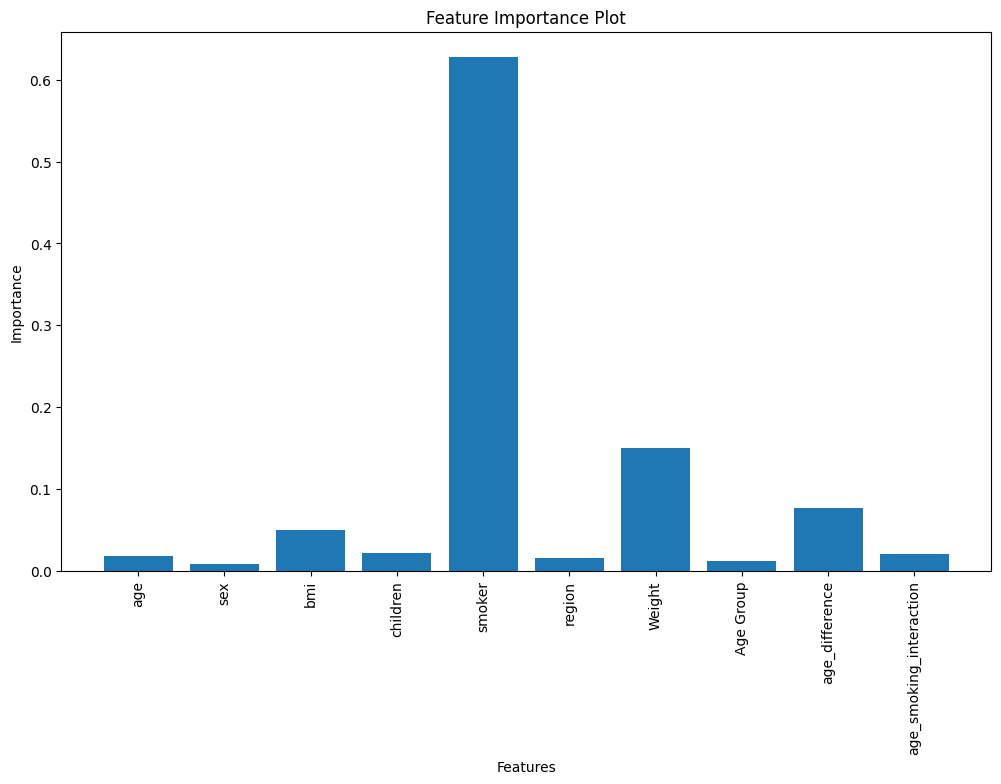

In [298]:

plt.figure(figsize=(12,7))
plt.bar(range(len(best_model.feature_importances_)), best_model.feature_importances_)
plt.xticks(range(len(best_model.feature_importances_)), x_tr.columns, rotation=90)
plt.title("Feature Importance Plot")
plt.xlabel("Features")
plt.ylabel("Importance")

feature_importance=best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
sorted_importance = feature_importance[sorted_idx]
sorted_feature_names = x.columns[sorted_idx]

# Öznitelikleri ve önemlerini yazdırın
result = {'Column': [], 'Importance': []}
for idx, importance in zip(sorted_feature_names, sorted_importance):
    result['Column'].append(idx)
    result['Importance'].append(importance)
result=pd.DataFrame(result)
result

Optimatation DF

In [352]:
x=df.drop('charges',axis=1)
y=df['charges']
scaler = MinMaxScaler()
x_tr_scaled = scaler.fit_transform(x_tr)

x_ts_scaled = scaler.transform(x_ts)
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.25,random_state=42)

In [353]:
from sklearn.model_selection import cross_validate
Cart=DecisionTreeRegressor()
Cart.fit(x_tr,y_tr)
score=Cart.score(x_ts,y_ts)
y_pr=Cart.predict(x_ts)
r2=r2_score(y_ts,y_pr)
rmse=np.sqrt(mean_squared_error(y_ts,y_pr))
cross=cross_validate(Cart,x_tr,y_tr,cv=15)
print("Score",score)
print("R2",r2)
print("Rmse",rmse)
print(f"="*50)
print("Cross",cross)

Score 0.9346122267030528
R2 0.9346122267030528
Rmse 3229.3588505332546
Cross {'fit_time': array([0.00900292, 0.00900245, 0.00900292, 0.00900078, 0.00899577,
       0.00800157, 0.00800323, 0.01000357, 0.01300311, 0.01500273,
       0.01100397, 0.01200652, 0.01400542, 0.01299953, 0.01100135]), 'score_time': array([0.00200009, 0.00099993, 0.00099969, 0.0010066 , 0.0010016 ,
       0.00199914, 0.00099993, 0.00200105, 0.00199962, 0.00299954,
       0.00300002, 0.00199604, 0.0030005 , 0.00300241, 0.00200009]), 'test_score': array([0.99444908, 0.91788627, 0.94804722, 0.97856705, 0.90600268,
       0.91107901, 0.86274637, 0.87437928, 0.95520732, 0.96433055,
       0.95242128, 0.90539994, 0.79273075, 0.91840201, 0.95270688])}


In [356]:
params = {
       "criterion":('squared_root', 'absolute_error', 'poisson'), 
       "splitter":("best", "random"), 
       "max_depth":(list(range(1, 20))), 
       "min_samples_split":[2, 3, 4], 
       "min_samples_leaf":list(range(1, 20)), 
   }
   
   
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg = GridSearchCV(tree_reg, params, scoring="r2", n_jobs=-1, verbose=1, cv=3)
tree_reg.fit(x_tr, y_tr)
y_pr=tree_reg.predict(x_ts)
r2=r2_score(y_pr,y_ts)
rmse=np.sqrt(y_pr,y_ts)
best_params = tree_reg.best_params_
print(f"Best paramters: {best_params}")
print(f"R2:{r2}")
print(f"Rmse:{rmse}")

Fitting 3 folds for each of 6498 candidates, totalling 19494 fits


c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6498 fits failed out of a total of 19494.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

Best paramters: {'criterion': 'absolute_error', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
R2:0.9239376070304472
Rmse:1106     94.805900
1321    167.197575
2313    109.691960
2274     41.019471
1432     58.252522
           ...    
1948     49.940184
2268     50.851260
1922     77.281162
361      68.928006
1748    117.662679
Name: charges, Length: 693, dtype: float64


KNN Optimatiaan


In [360]:
sc=StandardScaler()
x=dfx.drop('charges',axis=1)
y=dfx['charges']
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.25, random_state=42)
x_ts_scaled=sc.fit_transform(x_ts)
x_tr_scaled=sc.fit_transform(x_tr)


In [361]:
knn=KNeighborsRegressor(n_neighbors=1)
knn.fit(x_tr_scaled,y_tr)
y_pr=knn.predict(x_ts_scaled)
r2=r2_score(y_ts,y_pr)
rmse=np.sqrt(mean_squared_error(y_ts,y_pr))
print("R2",r2)
print("Rmse",rmse)




R2 0.9182452378636697
Rmse 3610.9756729041064


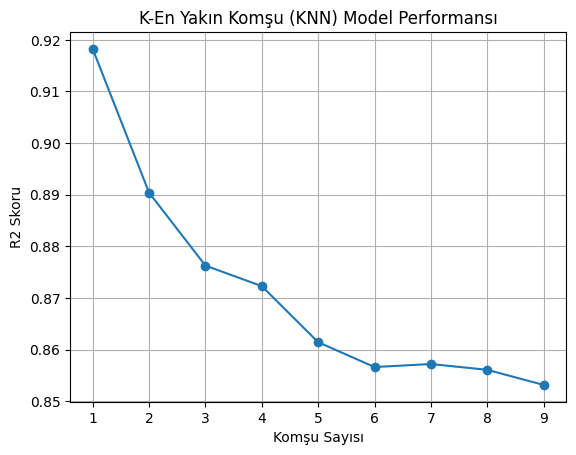

In [362]:
neighbors = range(1, 10)

# Skorları ve komşu sayılarını depolamak için boş listeler oluşturun
scores = []

for n_neighbors in neighbors:
    # KNeighborsRegressor modelini oluşturun
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    # Modeli eğitin
    knn.fit(x_tr_scaled, y_tr)
    
    # Test verileri üzerinde tahmin yapın
    y_pred = knn.predict(x_ts_scaled)
    
    # R2 skorunu hesaplayın ve listeye ekleyin
    score = r2_score(y_ts, y_pred)
    scores.append(score)

# Grafiği çizdirin
plt.plot(neighbors, scores, marker='o')
plt.title('K-En Yakın Komşu (KNN) Model Performansı')
plt.xlabel('Komşu Sayısı')
plt.ylabel('R2 Skoru')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

In [366]:
knn = KNeighborsRegressor()

# GridSearch için parametrelerin bir listesini belirtin
param_grid = {
    'n_neighbors': [1, 5, 7, 9],  # K değeri için denenecek değerler
    'weights': ['uniform', 'distance'],  # Kullanılacak ağırlık fonksiyonları
    'metric': ['euclidean', 'manhattan']  # Kullanılacak mesafe metrikleri
}

# GridSearchCV oluşturun
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')

# GridSearchCV'yi eğitin
grid_search.fit(x_tr_scaled, y_tr)

# En iyi parametreleri ve en iyi skoru alın
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# En iyi parametrelerle modeli tekrar oluşturun
best_knn = KNeighborsRegressor(**best_params)
best_knn.fit(x_tr_scaled, y_tr)


y_pred = best_knn.predict(x_ts_scaled)


r2 = r2_score(y_ts, y_pred)
rmse = np.sqrt(mean_squared_error(y_ts, y_pred))

print("En iyi parametreler:", best_params)
print("En iyi skor:", best_score)
print("R2 skoru:", r2)
print("RMSE değeri:", rmse)

En iyi parametreler: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
En iyi skor: 0.9370486589760872
R2 skoru: 0.9000021809244648
RMSE değeri: 3993.588352980173


C:\Users\samet\AppData\Local\Temp\ipykernel_21272\1027704793.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=3,color='r')


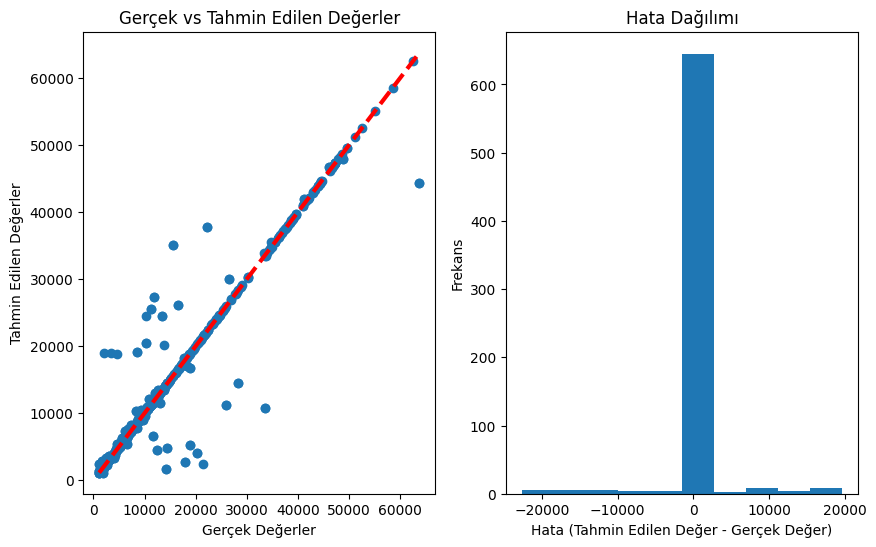

In [367]:
y_true = y_ts
y_pred = y_pr
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)

plt.scatter(y_true, y_pred)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=3,color='r')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs Tahmin Edilen Değerler")

plt.subplot(1,2,2)
errors = y_pred - y_true


plt.hist(errors, bins=10)
plt.xlabel("Hata (Tahmin Edilen Değer - Gerçek Değer)")
plt.ylabel("Frekans")
plt.title("Hata Dağılımı")
plt.show()
plt.show()